# Data Plotting and Fitting Franck Hertz Experiment

##### Micheal Jones and Jessamine Huang
Intermediate Lab 

https://GitHub.com/MJones98806/Intermediate-Lab-Repository


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
from uncertainties import ufloat, nominal_value, std_dev
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [2]:
"""
Define fit curve function
"""

def franckHz(x, a, w, p, m, b):
    return (a*x)*(np.cos((w*x+p))) + (m*x - b)

In [3]:
"""
Import data, here sample data and data for analysis are imported under seperate names
"""

dataSample = np.loadtxt('dataFH.txt')
data = np.loadtxt('FranckHzdata2.txt')

In [4]:
"""
Slice data to reflect appropriate values, suffix 1 indicates data from the first trial and 2 from the second.
The data being used for nnalysis is an expanded data set from the second trial
"""

accelVoltage1 = dataSample[ : ,0]
anodeCurrent1 = dataSample[ : ,1]
accelVoltage2 = dataSample[ : ,2]
anodeCurrent2 = dataSample[ : ,3]
accelVoltage = data[ : ,0]
anodeCurrent = data[ : ,1]

sampleX = []
sampleY = []

sampleX = np.append(accelVoltage1 , accelVoltage2)
sampleY = np.append(anodeCurrent1 , anodeCurrent2)

x = np.arange(5,45,0.1)

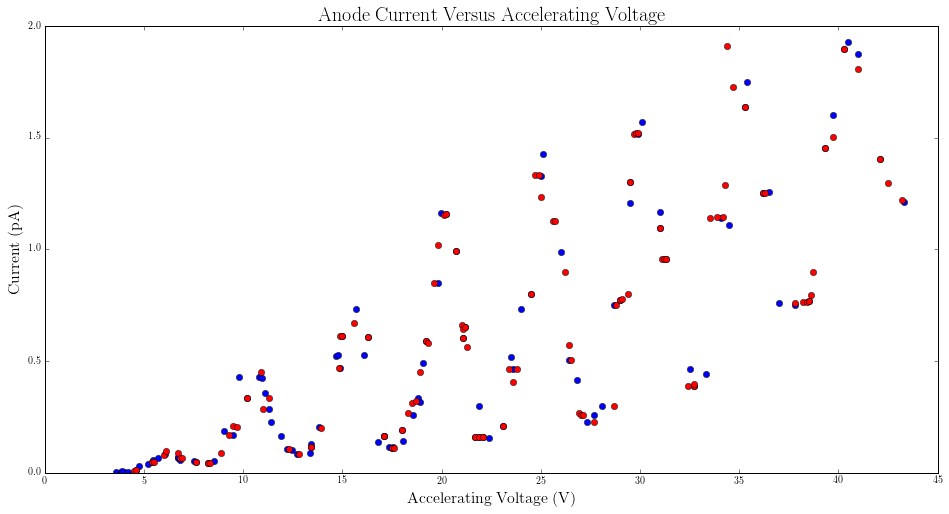

In [5]:
"""
Here I'll plot the sample data from the two trials together with different colors for comparison
"""

plt.figure(figsize=(16,8))
plt.plot(sampleX,sampleY,'o')
plt.plot(accelVoltage,anodeCurrent,'o', color='red')
plt.title(r'$\mathrm{Anode\ Current\ Versus\ Accelerating\ Voltage}$', fontsize=20)
plt.ylabel(r'$\mathrm{Current\ (pA)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{Accelerating\ Voltage\ (V)}$', fontsize = 16)
plt.show()

In [6]:
"""
Using scipy's cure_fit function I find the parameters I need for my fit function to be accurate
I also am given the covariance matrix elements allowing for complex error analysis to be computed for me
"""

fitParams, fitCovariances = curve_fit(franckHz, accelVoltage, anodeCurrent)
print(fitParams)
print(fitCovariances)

[ 0.01682531  1.24663739 -6.19815517  0.03843568  0.23920629]
[[  1.01171519e-06   4.70236461e-07  -1.41240363e-05   1.25376311e-07
    3.95611388e-06]
 [  4.70236461e-07   5.11903298e-05  -1.55887399e-03  -1.09955434e-06
   -1.39157514e-05]
 [ -1.41240363e-05  -1.55887399e-03   5.05088535e-02   2.03823873e-05
    2.25422535e-04]
 [  1.25376311e-07  -1.09955434e-06   2.03823873e-05   2.80705159e-06
    6.47567314e-05]
 [  3.95611388e-06  -1.39157514e-05   2.25422535e-04   6.47567314e-05
    1.79629001e-03]]


In [7]:
"""
Here I define values for my error bars which will appear on the final graph.
In order to do this I must use the fit covariance values provided to me by curve_fit to define sigma values,
this will be the amount above and below the experimental values obtained the actual value may be
"""

sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1], fitCovariances[2,2], fitCovariances[3,3], fitCovariances[4,4]])

values1 = np.array([
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]),   
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]),
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]),   
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]),
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]), 
    franckHz(accelVoltage, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]) 
    ])
values2 = np.array([
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]),   
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] + sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]),
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]),   
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] + sigma[3], fitParams[4] - sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]),
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]), 
    franckHz(x, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2], fitParams[3] - sigma[3], fitParams[4] + sigma[4]) 
    ])

In [8]:
"""
Defining the fit error elements and sample size here will help organize and keep concise the next cell
"""

dataError = np.std(values1, axis=0)
fitError = np.std(values2, axis=0)
N = len(x)
dx = (max(x) - min(x))/N

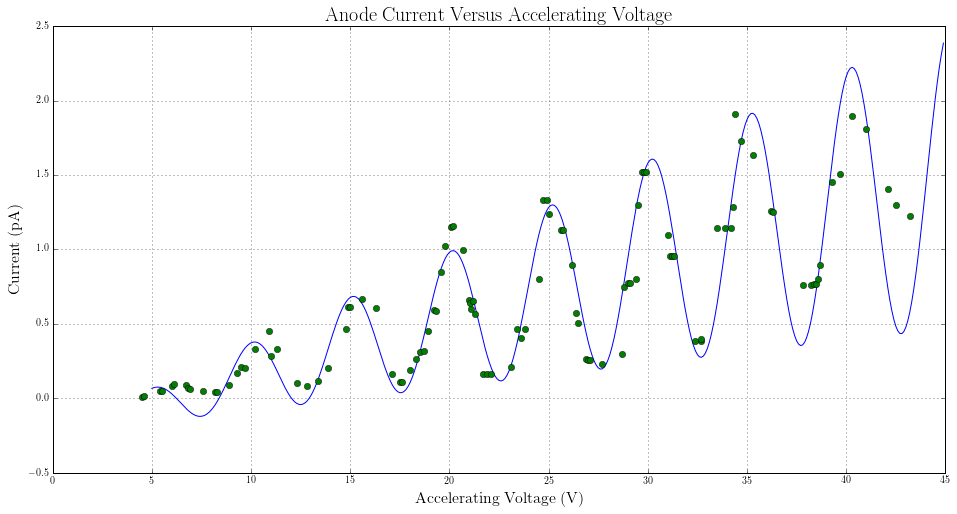

In [9]:
"""
Here I plot the data for comparison with my fit using the curve_fit parameters for all x in the desired range
"""

plt.figure(figsize=(16,8))
plt.title(r'$\mathrm{Anode\ Current\ Versus\ Accelerating\ Voltage}$', fontsize=20)
plt.ylabel(r'$\mathrm{Current\ (pA)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{Accelerating\ Voltage\ (V)}$', fontsize = 16)

plt.plot(x, franckHz(x, 1.35*fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4]))
plt.plot(accelVoltage, anodeCurrent,'o')
plt.grid(True)
#plt.savefig('dataFitted.png', bbox_inches=0, dpi=600)
plt.show()

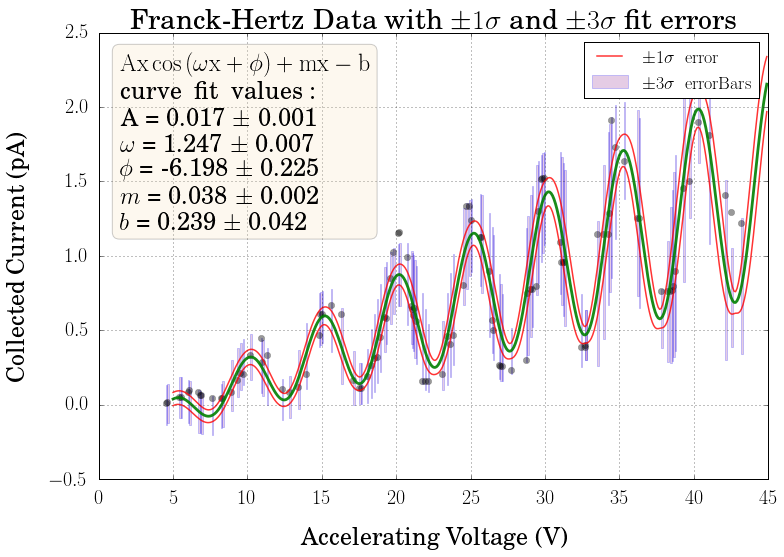

In [10]:
"""
Now I will use the sigma values I have obtained for each parameter as uncertainty to 
plot +/-1 sigma curves and +/-3 sigma error bars.
"""

fitEquation = r"$\displaystyle\mathrm{fit} =  A*x* \cos{\omega *x + \phi*\omega } + m*x + C $"
nSigma = 3
rc('text', usetex=True)
rc('font', family='serif')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20)
rcParams['xtick.major.pad'] = 10
rcParams['ytick.major.pad'] = 10

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

curveFit = franckHz(x, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4])

"""
The curve fit for all x is the focus of the code for the +/- 1 sigma lines
The data needs a fit, which will be a different sized array 
based on variations of the actual data from the fit,
This will be used for the +/- 3 sigma error bars
"""

dataFit = franckHz(accelVoltage, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4])

plt.plot(accelVoltage, anodeCurrent, 'o', color='black', alpha=0.4)
plt.hold(True)
plt.plot(x, curveFit, 
    linewidth=2.8, 
    color = 'green',
    alpha = 0.9)

plt.bar(left=accelVoltage, 
    height = 2*nSigma*dataError,  
    width=dx, 
    bottom = dataFit - nSigma*dataError, 
    orientation = 'vertical', 
    alpha=0.20, 
    color = 'purple',
    edgecolor = 'blue',
    label = r"$\displaystyle \pm 3\sigma\;\;\mathrm{errorBars}$")

plt.plot(x, curveFit+fitError, 
    linewidth = 1.5, 
    alpha = 0.8, 
    color = 'red',
    label = r"$\displaystyle  \pm 1\sigma\;\;\mathrm{error}$")

plt.plot(x, curveFit-fitError, 
    linewidth = 1.5, 
    alpha = 0.8, 
    color = 'red')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(1.4, 1.2, 
    ("$\mathrm{Ax \cos{(\omega x + \phi)} + mx - b \ \;}$\n curve \ fit \ values :\;}$\n A = %.3f\t $\pm$ %.3f\n $\omega$ = %.3f\t $\pm$ %.3f \n $\phi$ = %.3f\t $\pm$ %.3f\n $m$ = %.3f\t $\pm$ %.3f\n $b$ = %.3f\t $\pm$ %.3f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1], fitParams[2], sigma[2], fitParams[3], sigma[3], fitParams[4], sigma[4])), fontsize=24,bbox=props )
plt.xlabel(r'\textrm{Accelerating Voltage (V)}', fontsize=24)
plt.ylabel(r'\textrm{Collected Current (pA)}',fontsize=24)
plt.title(r"Franck-Hertz Data with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
      fontsize=28, color='k')
ax.legend(fontsize=18)
plt.grid(True)

plt.savefig('FranckHz3sigmaPlot.png', figsize=(6,4), dpi=400)

plt.show()